In [1]:
import os
import sys

import numpy as np
import pylab as pl

%matplotlib inline

In [2]:
pl.style.use('fabiostyle')

# import pandas

sys.path.append('../../../../code/')  # to be replaced!
import utils as ut
import plots as pt

In [3]:
NOTEBOOK_NAME = 'lambo'

In [4]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
# load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [5]:
folder = './autorestore/preprocessing'
for var in ('time_ax', 'traces', 'events', 'areas', 'cycles', 'licks', 'odor_CSm_ons', 'odor_rw_ons', 'rewards',
            'is_rewardt', 'is_CSmt', 'CYCLE_DURATION', 'CYCLE_START', 'CS_DURATION', 'DELAY', 'AFTER_DELAY_DURATION'): 
    exec('%s = ut.load_variable(\'%s\', folder=\'%s\')'%(var, var, folder))

In [6]:
CYCLE_START

-5

In [7]:
## in preprocessing odor_ass
licks_bs = 1.*ut.compute_licks_during(licks, cycles,
                                      start=-CYCLE_START-DELAY,
                                      end=-CYCLE_START)  # w.r.t. cycle start
licks_cs = 1.*ut.compute_licks_during(licks, cycles,
                                      start=-CYCLE_START,
                                      end=-CYCLE_START+CS_DURATION)
licks_tc = 1.*ut.compute_licks_during(licks, cycles,
                                      start=-CYCLE_START+CS_DURATION,
                                         end=-CYCLE_START+CS_DURATION+DELAY)
licks_cs_tc = 1.*ut.compute_licks_during(licks, cycles,
                                         start=-CYCLE_START,
                                         end=-CYCLE_START+CS_DURATION+DELAY)
licks_tc_us = 1.*ut.compute_licks_during(licks, cycles,
                                         start=-CYCLE_START+CS_DURATION,
                                         end=-CYCLE_START+CS_DURATION+DELAY+AFTER_DELAY_DURATION)
licks_cs_tc_us = 1.*ut.compute_licks_during(licks, cycles,
                                      start=-CYCLE_START,
                                      end=-CYCLE_START+CS_DURATION+DELAY+AFTER_DELAY_DURATION)
lickrates_bs = 1.*licks_bs/(DELAY+AFTER_DELAY_DURATION)
lick_ratios = np.nan_to_num(1.*(licks_tc_us-licks_bs)/(licks_tc_us+licks_bs))
lick_di = np.nan_to_num(1.*(np.mean(licks_tc[is_rewardt]-licks_bs[is_rewardt]) -
                            np.mean(licks_tc[is_CSmt]-licks_bs[is_CSmt]))/np.sqrt(0.5*(np.std(licks_tc)**2+np.std(licks_bs)**2)))
good_lick_trials = (licks_bs+licks_tc_us) >= 5

is_errCSmt = (lick_ratios>0.8) * ((licks_tc_us+licks_bs) > 4) * is_CSmt
print is_errCSmt.sum()

is_corrCSmt = ((licks_tc_us)==0) * is_CSmt
print is_corrCSmt.sum()
print licks_bs

1
41
[ 0.  0.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  3.  0.  0.  0.  0.  0.  3.  1.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  2.  0.  0.  1.  0.  2.  0.  2.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  1.  0.  1.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  3.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  0.  0.  0.  0.  5.  1.  0.  0.  2.  0.]


/home/fabios/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in divide


/home/fabios/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in double_scalars


[ 0.         -1.          0.          0.          0.          0.          0.
  0.          0.          0.         -1.          0.          0.          0.
  0.          1.          0.          0.          0.          0.          1.
  1.          1.          1.          1.          1.          0.         -1.
  1.          0.          0.          0.          0.          0.          1.
  0.         -1.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.33333333
  0.         -1.          0.         -1.          0.          0.          0.
  0.          0.          0.          0.          0.        ]
-0.230769230769
0.666666666667
-0.333333333333


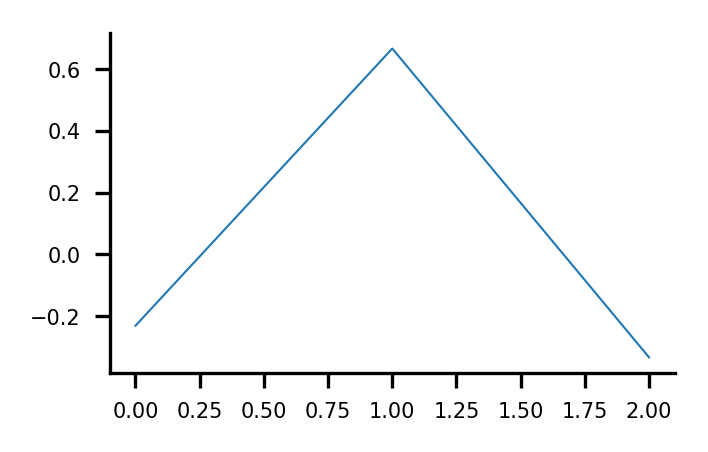

In [8]:
#copied from woods_et_al lambo, diff def of lick_dis then below, includes all trials instead of only 104
pseudorands = np.c_[np.where(is_CSmt)[0], np.where(is_rewardt)[0]]

lick_dis = []
for p in pseudorands:
    a = (licks_tc[p[1]]) - np.mean((licks_tc[p[0]]))
    b = (licks_tc[p[1]]) + np.mean((licks_tc[p[0]]))
    lick_dis.append(a/b)
            
lick_dis = np.nan_to_num(lick_dis)

def calc_di(licks_tc, pseudorands, odor1=1, odor2=0):
    a = np.mean(((licks_tc[[p[odor1] for p in pseudorands]]) -
         np.mean((licks_tc[[p[odor2] for p in pseudorands]]))))
    b = np.mean(((licks_tc[[p[odor1] for p in pseudorands]]) +
         np.mean((licks_tc[[p[odor2] for p in pseudorands]]))))
    return a/b

first_third = len(lick_dis)/3
second_third = (len(lick_dis)/3)*2

lick_dis_early = calc_di(licks_tc, pseudorands[:first_third])
lick_dis_mid = calc_di(licks_tc, pseudorands[first_third:second_third])
lick_dis_late = calc_di(licks_tc, pseudorands[-first_third:])

pl.plot([lick_dis_early, lick_dis_mid, lick_dis_late])
print lick_dis
print lick_dis_early
print lick_dis_mid
print lick_dis_late


/home/fabios/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in double_scalars


-0.222222222222
0.448275862069
0.157894736842


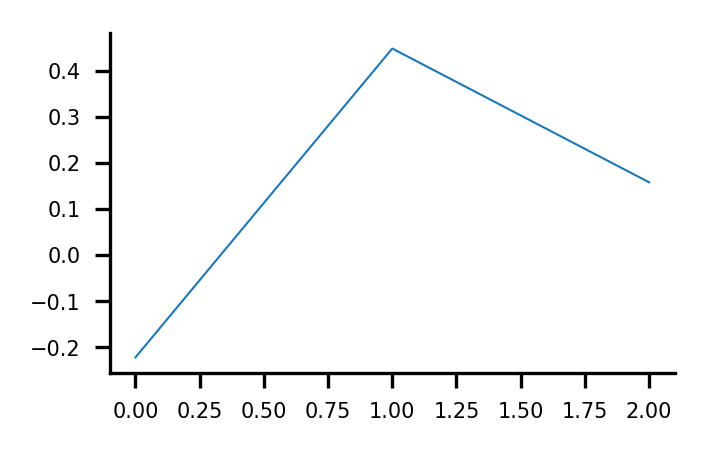

In [9]:
#copied from woods_et_al lambo, diff def of lick_dis then below, includes all trials instead of only 104
pseudorands = np.c_[np.where(is_CSmt)[0], np.where(is_rewardt)[0]]

lick_dis_cs = []
for p in pseudorands:
    a = (licks_cs[p[1]]+licks_tc[p[1]]) - np.mean((licks_cs[p[0]]+licks_tc[p[0]]))
    b = (licks_cs[p[1]]+licks_tc[p[1]]) + np.mean((licks_cs[p[0]]+licks_tc[p[0]]))
    lick_dis_cs.append(a/b)
            
lick_dis_cs = np.nan_to_num(lick_dis_cs)

def calc_di(licks_cs, licks_tc, pseudorands, odor1=1, odor2=0):
    a = np.mean(((licks_cs[[p[odor1] for p in pseudorands]]+licks_tc[[p[odor1] for p in pseudorands]]) -
         np.mean((licks_cs[[p[odor2] for p in pseudorands]]+licks_tc[[p[odor2] for p in pseudorands]]))))
    b = np.mean(((licks_cs[[p[odor1] for p in pseudorands]]+licks_tc[[p[odor1] for p in pseudorands]]) +
         np.mean((licks_cs[[p[odor2] for p in pseudorands]]+licks_tc[[p[odor2] for p in pseudorands]]))))
    return a/b

first_third = len(lick_dis_cs)/3
second_third = (len(lick_dis_cs)/3)*2

lick_dis_cs_early = calc_di(licks_cs, licks_tc, pseudorands[:first_third])
lick_dis_cs_mid = calc_di(licks_cs, licks_tc, pseudorands[first_third:second_third])
lick_dis_cs_late = calc_di(licks_cs, licks_tc, pseudorands[-first_third:])

pl.plot([lick_dis_cs_early, lick_dis_cs_mid, lick_dis_cs_late])

print lick_dis_cs_early
print lick_dis_cs_mid
print lick_dis_cs_late


In [10]:
def plot_licks(tone_onsets, licks, ax=None):
    if ax is None:
        fig, ax = pl.subplots(1, 1)
    for i, tone_ons in enumerate(tone_onsets):
        lick_filt = ((licks-tone_ons)>CYCLE_START) * ((licks-tone_ons)<CYCLE_DURATION)
        ax.vlines((licks-tone_ons)[lick_filt], i, i+1, lw=0.5)
    return ax

In [11]:
reward_times = []
for s, e in cycles[is_rewardt]:
# s, e = cycles[np.where(is_rewardt)[0][i]]
    try:
        r = rewards[(rewards>=s)*(rewards<e)][0]
        later_licks = licks-r
        reward_times.append(later_licks[(later_licks>=0)][0])
    except:
        reward_times.append(np.nan)

In [12]:
reward_times = np.r_[reward_times]

In [13]:
is_rewarded = reward_times<2

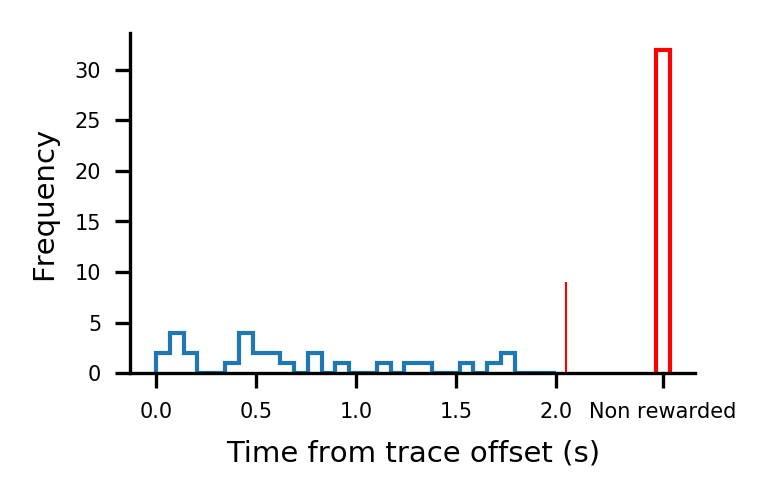

In [14]:
fig, ax = pl.subplots(1, 1)
ax.hist(reward_times[reward_times<2], bins=np.linspace(0, 2, 30), histtype='step');
ax.hist((reward_times>=2)*2.5, bins=[2.5, 2.5+2./30], histtype='step', color='r');
ax.set_xticks(np.r_[np.arange(0, 2.1, 0.5), 2.5+1./30])
ax.set_xticklabels([i for i in np.arange(0, 2.1, 0.5)] + ['Non rewarded'])

ax.vlines(np.median(reward_times), 0, 9, 'r')

ax.set_xlabel('Time from trace offset (s)')
ax.set_ylabel('Frequency')

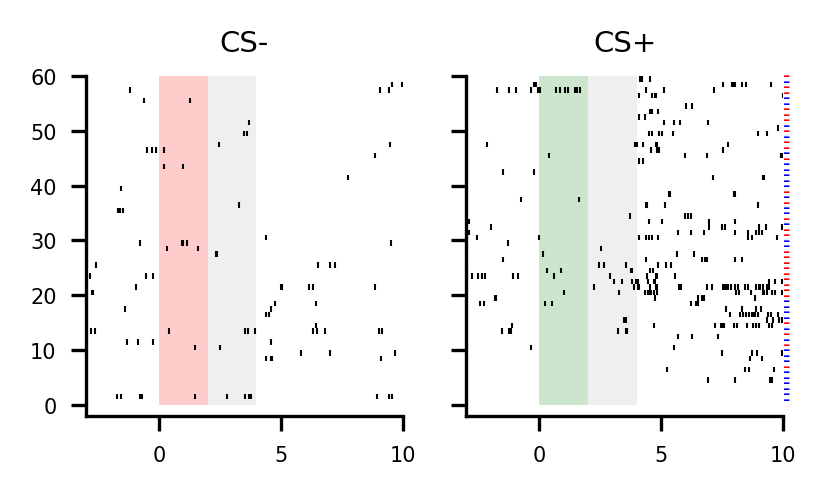

In [15]:
fig, axs = pl.subplots(1, 2, figsize=(3, 1.5), sharey=True)
plot_licks(odor_CSm_ons, licks, ax=axs[0])
axs[0].set_title('CS-')
plot_licks(odor_rw_ons, licks, ax=axs[1])
axs[1].set_title('CS+')
for c, ax in zip(['r', 'g'], axs):
    ax.set_xlim(CYCLE_START, CYCLE_START+CYCLE_DURATION)
    
    ax.set_ylim(-2, len(odor_CSm_ons))
    ax.set_xlim(-3, 10)
    
    pt.plot_period_bar(ax, 0, color=c, start_end=(0, CS_DURATION), alpha=0.2, zorder=0, delta_y=len(odor_CSm_ons))
    pt.plot_period_bar(ax, 0, color='0.7', start_end=(CS_DURATION, CS_DURATION+DELAY),
                       delta_y=len(odor_CSm_ons), alpha=0.2, zorder=0)
    
    pt.nicer_plot(ax)

[axs[1].text(10, i, "-", color="r") for i, v in enumerate(np.r_[is_rewarded]) if v];
[axs[1].text(10, i, "-", color="b") for i, v in enumerate(np.r_[is_rewarded]) if not v];
# fig.savefig("../img/lambo.pdf")

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [17]:
lr = LinearRegression()
labels = (np.r_[is_rewardt] * 0) + (np.r_[is_CSmt] * 1)

In [18]:
%%time
lick_scores = []
n_train = 10
n_test = 4
for i in range(len(labels)-n_train-n_test):
    which_train = range(i, i+n_train)
    which_test = range(i+1+n_train, i+1+n_train+n_test)
    lr.fit(lick_ratios[which_train].reshape(-1, 1), labels[which_train])
    lick_scores.append(lr.score(lick_ratios[which_test].reshape(-1, 1), labels[which_test]))
    
lick_scores = np.r_[lick_scores]

CPU times: user 52 ms, sys: 0 ns, total: 52 ms
Wall time: 49.4 ms


In [19]:
%%time
lick_scores_cv = []
n_train = 10
n_test = 4
for i in range(len(labels)-n_train-n_test):
    which = range(i, i+n_train+n_test)
    lick_scores_cv.append(cross_val_score(lr, lick_ratios[which].reshape(-1, 1), labels[which], cv=5))
    
lick_scores_cv = np.r_[lick_scores_cv]

CPU times: user 788 ms, sys: 4 ms, total: 792 ms
Wall time: 786 ms


In [20]:
n_licks = np.r_[[((licks>=(s-CYCLE_START+CS_DURATION)) * (licks<(s-CYCLE_START+CS_DURATION+DELAY))).sum() for s, e in cycles]]

In [21]:
# %%time tr only
lick_dis_train = []
n_train = 10
n_test = 4
for i in range(len(n_licks)-n_train-n_test):
    which_test = range(i+1+n_train, i+1+n_train+n_test)
    l_CSmt = n_licks[which_test][np.r_[is_CSmt][which_test]].sum()
    l_rewardt = n_licks[which_test][np.r_[is_rewardt][which_test]].sum()
    # compute lick DIs here:
    try:
        lick_dis_train.append(1.*l_rewardt/(l_rewardt+l_CSmt))
    except ZeroDivisionError:
        lick_dis_train.append(0)
    
lick_dis_train = np.r_[lick_dis_train]

print lick_dis_train

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.5         1.          1.          1.          1.          1.          1.
  0.          0.          0.          0.          0.          0.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.          0.          1.
  0.33333333  0.33333333  0.33333333  0.          0.          0.          0.
  0.          0.          0.          0.          0.          1.          1.
  1.          1.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          1.          1.          1.          0.66666667
  0.          0.          0.          0.          0.          0.          0.
  0

In [22]:
# %%time includes cs and tr
n_licks = np.r_[[((licks>=(s-CYCLE_START)) * (licks<(s-CYCLE_START+CS_DURATION+DELAY))).sum() for s, e in cycles]]

lick_dis_cs_train = []
n_train = 10
n_test = 4
for i in range(len(n_licks)-n_train-n_test):
    which_test = range(i+1+n_train, i+1+n_train+n_test)
    l_CSmt = n_licks[which_test][np.r_[is_CSmt][which_test]].sum()
    l_rewardt = n_licks[which_test][np.r_[is_rewardt][which_test]].sum()
    # compute lick DIs here:
    try:
        lick_dis_cs_train.append(1.*l_rewardt/(l_rewardt+l_CSmt))
    except ZeroDivisionError:
        lick_dis_cs_train.append(0)
    
lick_dis_cs_train = np.r_[lick_dis_cs_train]

print lick_dis_cs_train

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.42857143  1.          1.          1.          1.          1.          1.
  0.          0.          0.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  0.5         0.33333333  0.2         0.          0.          0.          0.
  0.          0.          0.          0.          0.          1.          1.
  1.          1.          0.          0.          0.          0.5         0.5
  1.          1.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.33333333  0.33333333  1.          1.          0.66666667  0.66666667
  0.5         0.          0.          0.          0.          0.          0.
  0.          

In [23]:
save_workspace(db)

Could not store variable 'os'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'sys'. Skipping...


In [24]:
lick_dis

array([ 0.        , -1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  0.        , -1.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        , -1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.33333333,  0.        , -1.        ,
        0.        , -1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [25]:
lick_dis_cs

array([ 0.        , -1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -1.        ,  0.        ,  0.        , -0.14285714,  0.        ,
        1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  0.        , -0.33333333, -0.33333333, -1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        , -1.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -1.        ,  0.        ,
        1.        , -1.        ,  0.33333333,  0.        , -1.        ,
        0.        , -1.        ,  0.        ,  0.        ,  0.        ,
       -1.        ,  0.        ,  1.        ,  0.        ,  0.        ])

In [26]:
lick_di

0.098022729204954778